In [1]:
import psutil
print('Instance Memory (GB): %0.2f' % (psutil.virtual_memory().total/2.**30))
print('Available Memory (GB): %0.2f' % (psutil.virtual_memory().available/2.**30))
print('CPU Count: %d' % psutil.cpu_count())

Instance Memory (GB): 29.43
Available Memory (GB): 27.61
CPU Count: 16


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pyodbc

In [3]:
sns.set(rc={'figure.figsize': (15, 8)})

# PyMC3 Walkthrough

In [4]:
import theano.tensor as tt
import pymc3 as pm

In [5]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    plus_2 = pm.Deterministic('x plus 2', mu + 2)  # Deterministic means keep track of calculation
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(1000))
    trace = pm.sample(1000, tune=500, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sd, mu]
Sampling 8 chains: 100%|██████████| 12000/12000 [00:02<00:00, 4169.53draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


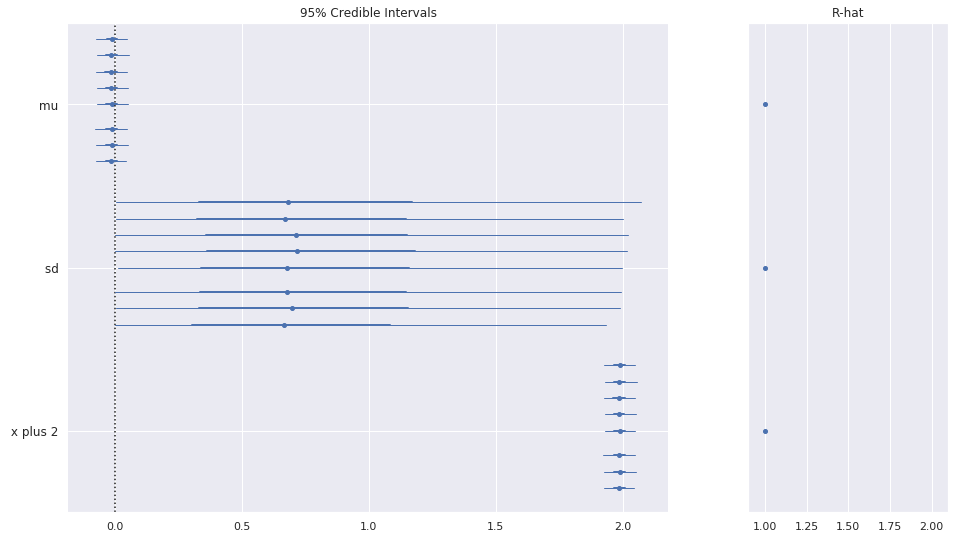

In [6]:
pm.forestplot(trace);

In [6]:
model.basic_RVs

[mu, obs]

In [7]:
model.free_RVs

[mu]

In [9]:
model.observed_RVs

[obs]

In [10]:
model.logp({'mu': 0})

array(-132.31103415)

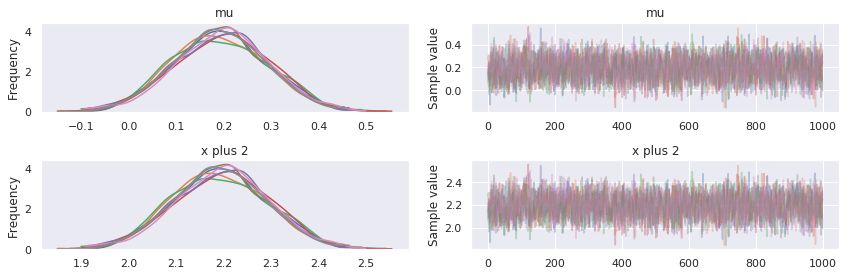

In [19]:
pm.traceplot(trace);